
<a href="https://colab.research.google.com/github/takzen/ai-engineering-handbook/blob/main/42_Statistics_Masterclass.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 📉 Statistics Masterclass: Fundamenty Data Science

Statystyka to gramatyka Data Science. Bez niej modele ML są tylko czarną magią.
W tym notatniku przejdziemy przez absolutne fundamenty, które pozwolą Ci rozumieć dane.

**Spis treści:**
1.  **Fundamenty:** Wariancja, Odchylenie Standardowe.
2.  **Wielkie Prawa:** Prawo Wielkich Liczb i Twierdzenie Graniczne (CLT).
3.  **Rozkłady:** Normalny (Gaussa) i Reguła 3 Sigm.
4.  **Testowanie Rozkładu:** Czy to Gauss? (Shapiro-Wilk, Q-Q Plot).
5.  **Testy Parametryczne (Porównywanie grup):** T-test i ANOVA.
6.  **Testy Kategorii:** Chi-Kwadrat ($\chi^2$).

## 0. Fundamenty Absolutne: Średnia, Mediana, Dominanta

Zanim zaczniemy liczyć błędy, musimy wiedzieć, gdzie jest "środek" danych. Mamy trzy główne sposoby:

1.  **Średnia (Mean):** Suma wszystkiego podzielona przez liczbę elementów.
    *   *Wada:* Wrażliwa na **Outliery** (Wystarczy jeden miliarder w barze, żeby średnia zarobków skoczyła do miliona).
2.  **Mediana (Median):** Wartość środkowa. Jeśli ustawisz wszystkich w szeregu, to ten w samym środku.
    *   *Zaleta:* Odporna na miliarderów. Daje prawdziwy obraz "typowego" przypadku.
3.  **Dominanta (Mode):** Wartość, która występuje najczęściej.
    *   *Zastosowanie:* Głównie do danych kategorycznych (np. najczęstszy kolor oczu).

**Zasada Analityka:**
Jeśli rozkład jest symetryczny (Górka) -> Średnia i Mediana są w tym samym miejscu.
Jeśli rozkład jest skośny (Zarobki) -> Patrz na Medianę!

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Ustawienia wizualne
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Biblioteki gotowe. Zaczynamy lekcję statystyki.")

Biblioteki gotowe. Zaczynamy lekcję statystyki.


Dane przed wejściem Gatesa: [4000 4200 4500 4800 5000 5200 5500 5800 6000 6000]
Średnia: 5100
Mediana: 5100
------------------------------
Dane z Gatesem (11 osób).
🔴 ŚREDNIA:  9095545 (Każdy w barze jest milionerem? Kłamstwo!)
🟢 MEDIANA:  5200 (Typowy klient nadal zarabia 5 tys. Prawda.)
🔵 DOMINANTA: 6000 (Najczęstsza pensja to 6000)


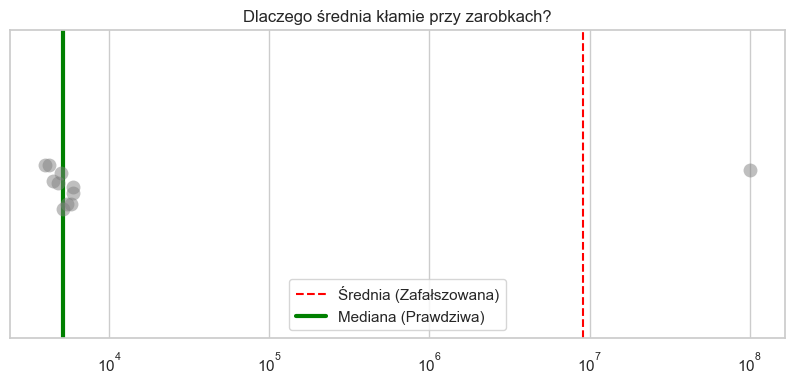

In [4]:
# SYMULACJA: "Bill Gates wchodzi do baru"
# Mamy 10 normalnych ludzi zarabiających 4-6 tys.
zarobki = np.array([4000, 4200, 4500, 4800, 5000, 5200, 5500, 5800, 6000, 6000])

print(f"Dane przed wejściem Gatesa: {zarobki}")
print(f"Średnia: {np.mean(zarobki):.0f}")
print(f"Mediana: {np.median(zarobki):.0f}")
print("-" * 30)

# Wchodzi Bill Gates (Zarabia 100 milionów)
zarobki_gates = np.append(zarobki, [100_000_000])

mean = np.mean(zarobki_gates)
median = np.median(zarobki_gates)
mode = stats.mode(zarobki_gates, keepdims=True).mode[0]

print(f"Dane z Gatesem (11 osób).")
print(f"🔴 ŚREDNIA:  {mean:.0f} (Każdy w barze jest milionerem? Kłamstwo!)")
print(f"🟢 MEDIANA:  {median:.0f} (Typowy klient nadal zarabia 5 tys. Prawda.)")
print(f"🔵 DOMINANTA: {mode} (Najczęstsza pensja to 6000)")

# Wizualizacja Kłamstwa Średniej
plt.figure(figsize=(10, 4))
sns.stripplot(x=zarobki_gates, jitter=True, size=10, color='gray', alpha=0.5)
plt.axvline(mean, color='red', linestyle='--', label='Średnia (Zafałszowana)')
plt.axvline(median, color='green', linestyle='-', linewidth=3, label='Mediana (Prawdziwa)')
plt.xscale('log') # Skala logarytmiczna, żeby zmieścić Gatesa na wykresie
plt.title("Dlaczego średnia kłamie przy zarobkach?")
plt.legend()
plt.show()

### Rozstęp i Kwartyle (IQR)

Sama średnia to za mało. Musimy wiedzieć, jak szerokie są dane.

*   **Min / Max:** Wartości skrajne.
*   **Rozstęp (Range):** Max - Min.
*   **Kwartyle (Quartiles):** Dzielimy dane na 4 ćwiartki (25%, 50%, 75%).
    *   Q1 (25%): 25% ludzi zarabia mniej niż to.
    *   Q2 (50%): To jest **Mediana**.
    *   Q3 (75%): 75% ludzi zarabia mniej niż to.
*   **IQR (Interquartile Range):** Q3 - Q1. To jest "środek stawki".

Wzór na wykrywanie dziwnych danych (Outliers) w Boxplocie:
$$ Outlier < Q1 - 1.5 \times IQR $$
$$ Outlier > Q3 + 1.5 \times IQR $$

## 1. Wariancja i Odchylenie Standardowe

Zanim przejdziemy do trudnych rzeczy, musimy rozumieć "rozrzut".

*   **Średnia ($\mu$):** Środek danych.
*   **Wariancja ($\sigma^2$):** Jak bardzo dane są "rozstrzelone" wokół średniej (w jednostkach kwadratowych).
*   **Odchylenie Standardowe ($\sigma$):** Pierwiastek z wariancji. Mówi nam: *"Dane typowo mylą się o X od średniej"*.

Średnia: 175.19 cm
Wariancja: 95.79 cm^2 (Trudne do interpretacji)
Odchylenie Std: 9.79 cm (Typowy człowiek różni się o tyle od średniej)


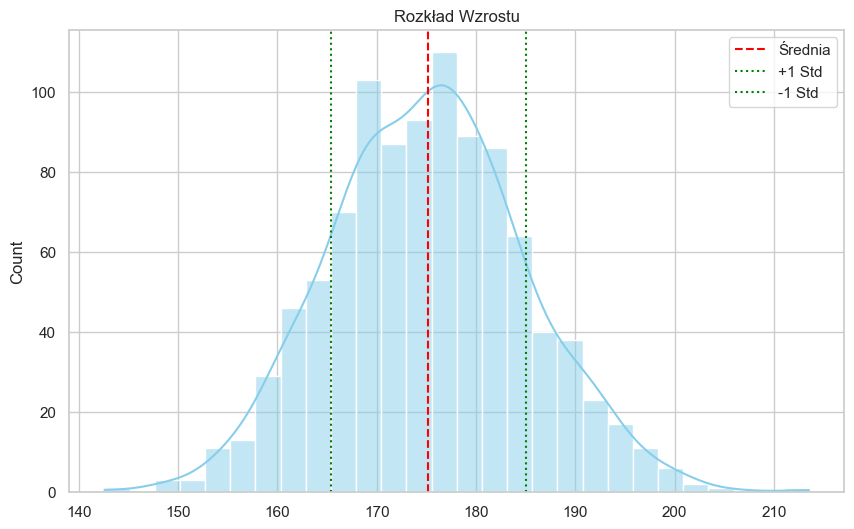

In [2]:
# Generujemy dane: Wzrost ludzi (średnia 175, odchylenie 10)
np.random.seed(42)
wzrost = np.random.normal(loc=175, scale=10, size=1000)

mean = np.mean(wzrost)
variance = np.var(wzrost)
std_dev = np.std(wzrost)

print(f"Średnia: {mean:.2f} cm")
print(f"Wariancja: {variance:.2f} cm^2 (Trudne do interpretacji)")
print(f"Odchylenie Std: {std_dev:.2f} cm (Typowy człowiek różni się o tyle od średniej)")

# Wizualizacja
sns.histplot(wzrost, kde=True, color='skyblue')
plt.axvline(mean, color='red', linestyle='--', label='Średnia')
plt.axvline(mean + std_dev, color='green', linestyle=':', label='+1 Std')
plt.axvline(mean - std_dev, color='green', linestyle=':', label='-1 Std')
plt.legend()
plt.title("Rozkład Wzrostu")
plt.show()

## 2. Wielkie Prawa Statystyki

Dwa twierdzenia, dzięki którym statystyka w ogóle działa.

### A. Prawo Wielkich Liczb (Law of Large Numbers)
Mówi: *"Im więcej prób wykonasz, tym bardziej Twój wynik zbliży się do teoretycznej prawdy".*
Jeśli rzucisz monetą 10 razy, możesz mieć 80% orłów (przypadek).
Jeśli rzucisz 10 000 razy, będziesz miał ~50% orłów.

In [3]:
# Symulacja rzutów monetą (0 = Reszka, 1 = Orzeł)
próby = [10, 100, 1000, 10000, 100000]

print("--- PRAWO WIELKICH LICZB ---")
for n in próby:
    rzuty = np.random.randint(0, 2, size=n)
    srednia = np.mean(rzuty)
    print(f"Rzutów: {n:<7} | Procent orłów: {srednia:.4f} (Teoria: 0.5000)")

--- PRAWO WIELKICH LICZB ---
Rzutów: 10      | Procent orłów: 0.3000 (Teoria: 0.5000)
Rzutów: 100     | Procent orłów: 0.5300 (Teoria: 0.5000)
Rzutów: 1000    | Procent orłów: 0.5160 (Teoria: 0.5000)
Rzutów: 10000   | Procent orłów: 0.5008 (Teoria: 0.5000)
Rzutów: 100000  | Procent orłów: 0.5015 (Teoria: 0.5000)


### B. Centralne Twierdzenie Graniczne (CLT)

To jest **magia**.
Mówi: *"Nieważne, jaki rozkład mają Twoje dane (może być płaski, skośny, dziwny). Jeśli weźmiesz z nich wiele próbek i policzysz ich ŚREDNIE, to te średnie ułożą się w Rozkład Normalny (Dzwon)."*

Dzięki temu możemy używać testów statystycznych (jak T-test) nawet na dziwnych danych, jeśli mamy ich wystarczająco dużo.

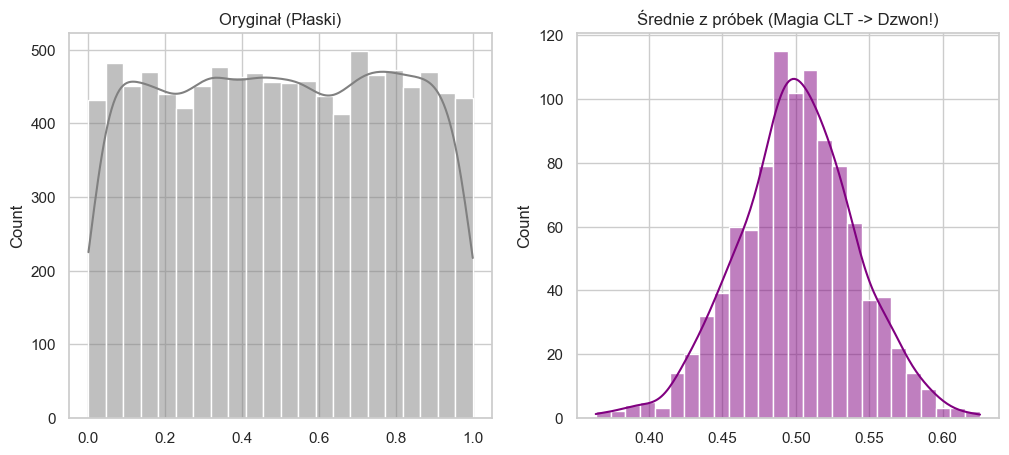

In [4]:
# Dane wejściowe: Rozkład jednostajny (Płaski - zupełnie nie jak dzwon!)
dane_plaskie = np.random.uniform(0, 1, 10000)

# Bierzemy 1000 próbek, każda po 50 elementów i liczymy ich średnie
srednie_z_probek = [np.mean(np.random.choice(dane_plaskie, 50)) for _ in range(1000)]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(dane_plaskie, kde=True, color='gray')
plt.title("Oryginał (Płaski)")

plt.subplot(1, 2, 2)
sns.histplot(srednie_z_probek, kde=True, color='purple')
plt.title("Średnie z próbek (Magia CLT -> Dzwon!)")
plt.show()

## 3. Rozkład Normalny i Reguła 3 Sigm

Rozkład Normalny (Gaussa) jest symetryczny.
Obowiązuje tu **Reguła 68-95-99.7**:
*   **$\pm 1\sigma$:** 68% danych (Typowe).
*   **$\pm 2\sigma$:** 95% danych (Rzadkie).
*   **$\pm 3\sigma$:** 99.7% danych (Bardzo rzadkie).

Wszystko poza 3 sigmami to zazwyczaj **Anomalia (Outlier)**.

Granice 3 sigma: [-3.03, 2.97]
Znalezione anomalie: [np.float64(3.1324494006125563), np.float64(3.0484225797123528), np.float64(10.0)]


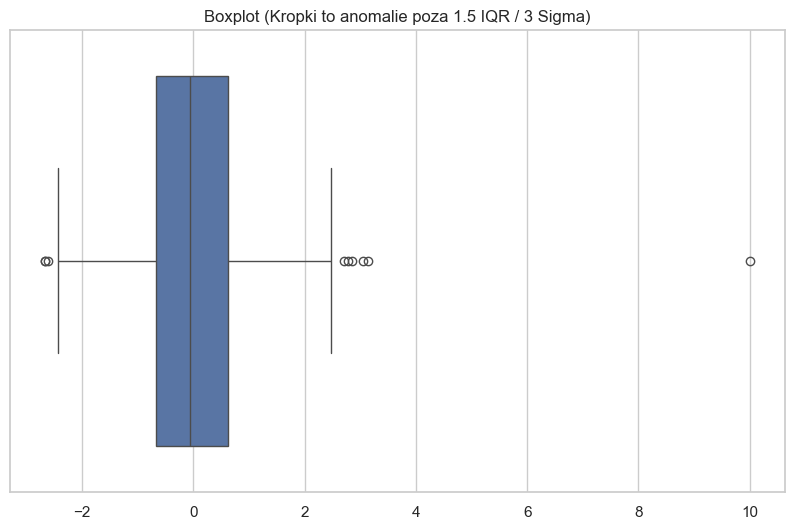

In [5]:
# Generujemy dane
data = np.random.normal(0, 1, 1000)

# Granice 3 sigma
lower, upper = np.mean(data) - 3*np.std(data), np.mean(data) + 3*np.std(data)

# Znajdźmy outlierów (sztucznie dodamy jednego)
data = np.append(data, [10.0]) # Ekstremalna wartość
outliers = [x for x in data if x < lower or x > upper]

print(f"Granice 3 sigma: [{lower:.2f}, {upper:.2f}]")
print(f"Znalezione anomalie: {outliers}")

sns.boxplot(x=data)
plt.title("Boxplot (Kropki to anomalie poza 1.5 IQR / 3 Sigma)")
plt.show()

Średnia: 0.02
Odchylenie (Sigma): 1.00
Granice 3 Sigma: od -2.99 do 3.03


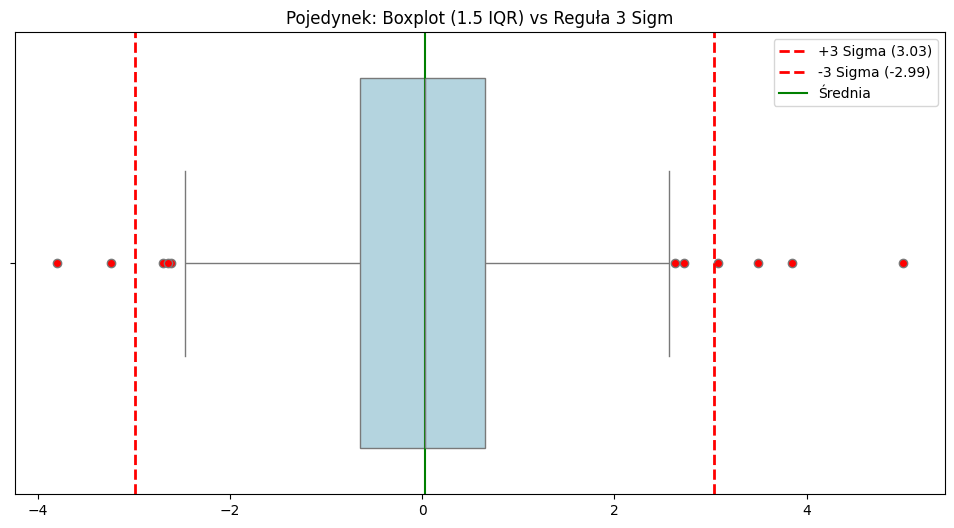

ANALIZA:
Widzisz czerwone kropki pomiędzy końcem 'wąsa' a czerwoną linią przerywaną?
Dla Boxplota (IQR) to już są anomalie.
Dla Reguły 3 Sigm - to jeszcze normalne dane.
Dopiero to, co jest ZA czerwoną linią, jest anomalią dla obu metod.


In [ ]:
# 1. GENERUJEMY DANE
# Rozkład normalny (średnia=0, odchylenie=1) + kilka skrajnych wartości
np.random.seed(42)
dane = np.random.normal(0, 1, 1000) 
dane = np.append(dane, [3.5, -3.8, 5.0]) # Dodajemy ręcznie anomalie

# 2. OBLICZENIA (Matematyka 3 Sigm)
mean = np.mean(dane)
std = np.std(dane)

limit_gorny = mean + 3 * std
limit_dolny = mean - 3 * std

print(f"Średnia: {mean:.2f}")
print(f"Odchylenie (Sigma): {std:.2f}")
print(f"Granice 3 Sigma: od {limit_dolny:.2f} do {limit_gorny:.2f}")

# 3. WIZUALIZACJA
plt.figure(figsize=(12, 6))

# Rysujemy standardowy Boxplot (On używa metody IQR, nie Sigmy!)
sns.boxplot(x=dane, color='lightblue', flierprops={"marker": "o", "markerfacecolor": "red"})

# Nakładamy na to nasze granice 3 Sigma
plt.axvline(limit_gorny, color='red', linestyle='--', linewidth=2, label=f'+3 Sigma ({limit_gorny:.2f})')
plt.axvline(limit_dolny, color='red', linestyle='--', linewidth=2, label=f'-3 Sigma ({limit_dolny:.2f})')

# Oznaczenie średniej
plt.axvline(mean, color='green', linestyle='-', label='Średnia')

plt.title("Pojedynek: Boxplot (1.5 IQR) vs Reguła 3 Sigm")
plt.legend()
plt.show()

print("ANALIZA:")
print("Widzisz czerwone kropki pomiędzy końcem 'wąsa' a czerwoną linią przerywaną?")
print("Dla Boxplota (IQR) to już są anomalie.")
print("Dla Reguły 3 Sigm - to jeszcze normalne dane.")
print("Dopiero to, co jest ZA czerwoną linią, jest anomalią dla obu metod.")

## 4. Testowanie Normalności (Shapiro-Wilk)

Wiele testów (T-test, ANOVA) zakłada, że dane mają rozkład normalny. Jak to sprawdzić?

1.  **Wizualnie:** Histogram lub Q-Q Plot (wykres kwantylowy - punkty powinny leżeć na linii).
2.  **Matematycznie:** Test Shapiro-Wilka.
    *   $H_0$: Dane są normalne.
    *   $p < 0.05$: Odrzucamy $H_0$ -> Dane NIE są normalne.

Dane Normalne p-value: 0.28723 (p > 0.05 -> Wygląda na Gaussa)
Dane Skośne p-value:   0.00000 (p < 0.05 -> To NIE jest Gauss)


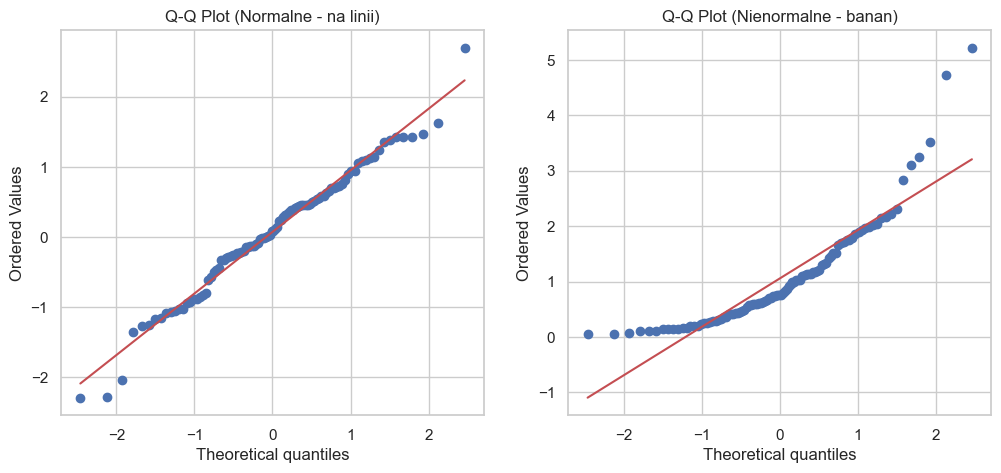

In [6]:
# Dane normalne
normal_data = np.random.normal(0, 1, 100)
# Dane nienormalne (Wykładnicze)
non_normal_data = np.random.exponential(1, 100)

# Test Shapiro-Wilka
stat, p_normal = stats.shapiro(normal_data)
stat2, p_non_normal = stats.shapiro(non_normal_data)

print(f"Dane Normalne p-value: {p_normal:.5f} (p > 0.05 -> Wygląda na Gaussa)")
print(f"Dane Skośne p-value:   {p_non_normal:.5f} (p < 0.05 -> To NIE jest Gauss)")

# Q-Q Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
stats.probplot(normal_data, dist="norm", plot=ax[0])
ax[0].set_title("Q-Q Plot (Normalne - na linii)")

stats.probplot(non_normal_data, dist="norm", plot=ax[1])
ax[1].set_title("Q-Q Plot (Nienormalne - banan)")
plt.show()

## 5. Testy Parametryczne (Porównywanie Grup)

### A. T-Test (Dwie grupy)
Porównuje średnie dwóch grup.
*   $H_0$: Średnie są równe.
*   $p < 0.05$: Jest różnica.

### B. ANOVA (Trzy+ grup)
Porównuje wariancję między grupami a wewnątrz grup.
*   Jeśli p < 0.05 -> Przynajmniej jedna grupa odstaje.

In [7]:
# 3 Grupy: A i B są podobne, C jest inna
grupa_a = np.random.normal(100, 10, 50)
grupa_b = np.random.normal(102, 10, 50)
grupa_c = np.random.normal(120, 10, 50)

# T-TEST (A vs C)
t_stat, p_ttest = stats.ttest_ind(grupa_a, grupa_c)
print(f"T-Test (A vs C): p={p_ttest:.10f} -> {'Różnica!' if p_ttest < 0.05 else 'Brak różnic'}")

# ANOVA (A vs B vs C)
f_stat, p_anova = stats.f_oneway(grupa_a, grupa_b, grupa_c)
print(f"ANOVA (Wszystkie): p={p_anova:.10f} -> {'Coś tu nie pasuje!' if p_anova < 0.05 else 'Wszyscy równi'}")

T-Test (A vs C): p=0.0000000000 -> Różnica!
ANOVA (Wszystkie): p=0.0000000000 -> Coś tu nie pasuje!


## 6. Test Chi-Kwadrat (Kategorie)

Co jeśli nie mamy liczb (wzrost, waga), tylko kategorie (Kolor oczu, Płeć)?
Chcemy sprawdzić, czy te cechy są zależne.

Przykład: Czy Płeć wpływa na wybór Filmu (Akcja / Romans)?
*   $H_0$: Brak związku (Niezależne).
*   $H_1$: Jest zależność.

Tworzymy **Tablicę Kontyngencji** (Tabela krzyżowa) i porównujemy to co widzimy ("Observed") z tym, co by było losowo ("Expected").

In [8]:
# Symulacja ankiety (100 osób)
# Wiersze: Mężczyzna, Kobieta
# Kolumny: Film Akcji, Romans

# Tabela obserwowana (To co zebraliśmy)
# Mężczyźni: 40 woli Akcję, 10 Romans
# Kobiety:   20 woli Akcję, 30 Romans
observed = np.array([
    [40, 10], 
    [20, 30]
])

# Test Chi2
chi2, p_val, dof, expected = stats.chi2_contingency(observed)

print("--- TABELA OBSERWOWANA ---")
print(observed)

print(f"\nWynik Chi-Square p-value: {p_val:.6f}")

if p_val < 0.05:
    print("✅ WNIOSEK: Płeć MA WPŁYW na wybór filmu (Zależność statystyczna).")
else:
    print("❌ WNIOSEK: Brak związku.")

--- TABELA OBSERWOWANA ---
[[40 10]
 [20 30]]

Wynik Chi-Square p-value: 0.000105
✅ WNIOSEK: Płeć MA WPŁYW na wybór filmu (Zależność statystyczna).


## 🧠 Podsumowanie: Mapa Drogowa

Jakiego testu użyć?

1.  **Mam liczby (ciągłe) i chcę sprawdzić rozkład:**
    *   Wizualnie: Histogram, Q-Q Plot.
    *   Dokładnie: **Shapiro-Wilk** (dla małych danych) lub Kolmogorov-Smirnov.

2.  **Mam 2 grupy (np. A/B testy):**
    *   Dane normalne? -> **T-test**.
    *   Dane dziwne/mało? -> **Mann-Whitney U** (nieparametryczny).

3.  **Mam 3+ grupy:**
    *   Dane normalne? -> **ANOVA**.
    *   Dane dziwne? -> **Kruskal-Wallis**.

4.  **Mam kategorie (Tak/Nie, Kolory):**
    *   **Chi-Square Test**.

To jest Twoja statystyczna apteczka pierwszej pomocy. 🚑

# 🚀 BONUS OD INŻYNIERA: Czego nie powiedzą Ci w szkole?

Zaliczenie testów powyżej to dopiero połowa sukcesu. Oto trzy mechanizmy, które musisz znać w prawdziwej pracy.

## 7. Wielkość Efektu (Cohen's d) - Pułapka "Dużych Danych"

Wyobraź sobie, że testujesz nowy lek na 1 000 000 pacjentów.
Lek skraca chorobę o **10 sekund**.
Przy takiej ilości danych T-test pokaże `p < 0.00001` (Bardzo istotne!).
Ale czy skrócenie choroby o 10 sekund ma sens biznesowy/medyczny? NIE.

Dlatego liczymy **Cohen's d** – miarę tego, **JAK DUŻA** jest różnica, niezależnie od liczby próbek.
$$ d = \frac{\text{Różnica Średnich}}{\text{Odchylenie Standardowe}} $$

*   0.2 = Mały efekt (Nuda)
*   0.5 = Średni efekt (Warto spojrzeć)
*   0.8 = Duży efekt (Eureka!)

In [9]:
# Symulacja "Pułapki P-value"
np.random.seed(42)
n_huge = 10000

# Grupa A: Średnia 100.0
# Grupa B: Średnia 100.1 (Różnica mikroskopijna!)
grupa_A = np.random.normal(100.0, 15, n_huge)
grupa_B = np.random.normal(100.1, 15, n_huge)

# 1. T-Test
t_stat, p_val = stats.ttest_ind(grupa_A, grupa_B)

print("--- P-VALUE vs EFFECT SIZE ---")
print(f"Różnica średnich: {np.mean(grupa_B) - np.mean(grupa_A):.2f}")
print(f"P-value: {p_val:.5f}") 

if p_val < 0.05:
    print("👉 Werdykt P-value: REWELACJA! Odkryliśmy różnicę! (Bo mamy dużo danych)")
else:
    print("👉 Werdykt P-value: Nuda.")

# 2. Cohen's d (Własna funkcja, bo scipy tego nie ma wprost)
def cohen_d(x, y):
    diff = np.mean(x) - np.mean(y)
    # Pooled Standard Deviation (Uspólione odchylenie)
    n1, n2 = len(x), len(y)
    var1, var2 = np.var(x, ddof=1), np.var(y, ddof=1)
    pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))
    return abs(diff / pooled_std)

d = cohen_d(grupa_A, grupa_B)
print(f"Cohen's d: {d:.4f}")

if d < 0.2:
    print("👉 Werdykt Cohena: Różnica jest ZANIEDBYWALNA. Szkoda czasu.")
else:
    print("👉 Werdykt Cohena: To jest ważne odkrycie.")

--- P-VALUE vs EFFECT SIZE ---
Różnica średnich: 0.34
P-value: 0.11506
👉 Werdykt P-value: Nuda.
Cohen's d: 0.0223
👉 Werdykt Cohena: Różnica jest ZANIEDBYWALNA. Szkoda czasu.


## 8. Bootstrapping (Statystyka dla Programistów)

A co jeśli Twoje dane są tak dziwne, że żaden wzór z książki nie pasuje?
Albo chcesz policzyć przedział ufności dla **mediany** (a wzory są głównie dla średniej)?

Używamy metody **Bootstrapping (Symulacja Monte Carlo)**.
Zamiast wzorów, używamy mocy obliczeniowej komputera:
1.  Weź swoje dane.
2.  Wylosuj z nich (ze zwracaniem) nową próbkę o tej samej wielkości.
3.  Policz to, co chcesz (np. medianę).
4.  Powtórz to 10,000 razy.
5.  Zobacz, jaki wyszedł rozkład wyników. To jest Twój przedział ufności.

Prawdziwa mediana: 4111.02
Przedział ufności 95% (Bootstrapped): [3711.90, 4466.47]


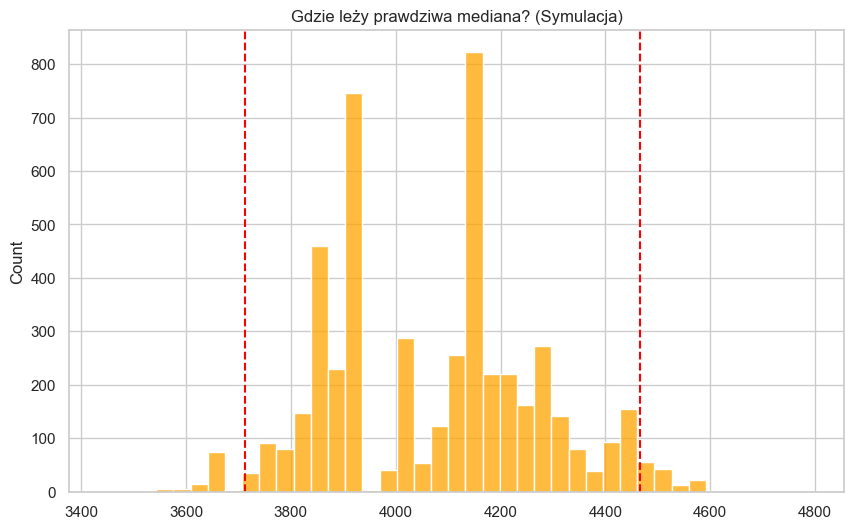

In [10]:
# Dane: Zarobki (bardzo skośne - większość mało, kilku milionerów)
zarobki = np.concatenate([
    np.random.normal(4000, 1000, 90), # 90 normalnych
    np.random.normal(50000, 5000, 10) # 10 prezesów
])

real_median = np.median(zarobki)
print(f"Prawdziwa mediana: {real_median:.2f}")

# BOOTSTRAPPING
bootstrap_medians = []
n_iterations = 5000

for _ in range(n_iterations):
    # Losujemy ze zwracaniem (resample)
    sample = np.random.choice(zarobki, size=len(zarobki), replace=True)
    bootstrap_medians.append(np.median(sample))

# Przedział ufności 95% (od 2.5% do 97.5% kwantyla)
lower = np.percentile(bootstrap_medians, 2.5)
upper = np.percentile(bootstrap_medians, 97.5)

print(f"Przedział ufności 95% (Bootstrapped): [{lower:.2f}, {upper:.2f}]")

# Wizualizacja
sns.histplot(bootstrap_medians, color='orange')
plt.axvline(lower, color='red', linestyle='--')
plt.axvline(upper, color='red', linestyle='--')
plt.title("Gdzie leży prawdziwa mediana? (Symulacja)")
plt.show()

## 9. Paradoks Simpsona (Największy Koszmar Analityka)

To sytuacja, w której trend w poszczególnych grupach jest odwrotny niż trend w całości.

**Przykład:**
*   Sklep A ma wyższą konwersję niż Sklep B w dni powszednie.
*   Sklep A ma wyższą konwersję niż Sklep B w weekendy.
*   **ALE:** Po zsumowaniu danych, Sklep B wygrywa.

Jak to możliwe? Zobaczmy na liczbach.

In [11]:
# TWORZYMY DANE (Symulacja Skuteczności Leku)

# Mężczyźni (Lek działa gorzej niż u kobiet, ale biorą go częściej)
men_drug_success = 80
men_drug_total = 100  # 80% skuteczności
men_placebo_success = 70
men_placebo_total = 100 # 70% skuteczności (Lek lepszy!)

# Kobiety (Lek działa świetnie, ale rzadko go biorą)
women_drug_success = 19
women_drug_total = 20 # 95% skuteczności
women_placebo_success = 90
women_placebo_total = 100 # 90% skuteczności (Lek lepszy!)

print(f"Mężczyźni: Lek {men_drug_success/men_drug_total:.2%} vs Placebo {men_placebo_success/men_placebo_total:.2%} -> LEK WYGRYWA")
print(f"Kobiety:   Lek {women_drug_success/women_drug_total:.2%} vs Placebo {women_placebo_success/women_placebo_total:.2%} -> LEK WYGRYWA")

# A TERAZ SUMUJEMY (AGREGACJA)
total_drug_success = men_drug_success + women_drug_success
total_drug_total = men_drug_total + women_drug_total

total_placebo_success = men_placebo_success + women_placebo_success
total_placebo_total = men_placebo_total + women_placebo_total

rate_drug = total_drug_success / total_drug_total
rate_placebo = total_placebo_success / total_placebo_total

print("-" * 40)
print(f"RAZEM:     Lek {rate_drug:.2%} vs Placebo {rate_placebo:.2%}")

if rate_placebo > rate_drug:
    print("😱 PARADOKS SIMPSONA: Całościowo wygrało Placebo, mimo że Lek był lepszy w każdej grupie osobno!")
    print("Dlaczego? Bo 'łatwiejsza' grupa (Kobiety) częściej brała Placebo, podbijając jego wynik.")

Mężczyźni: Lek 80.00% vs Placebo 70.00% -> LEK WYGRYWA
Kobiety:   Lek 95.00% vs Placebo 90.00% -> LEK WYGRYWA
----------------------------------------
RAZEM:     Lek 82.50% vs Placebo 80.00%


## 🧠 Wielkie Podsumowanie

Gratulacje. Właśnie przeszedłeś przyspieszony kurs, który na studiach trwa rok.

1.  **P-value** mówi, czy wynik nie jest przypadkiem, ale **Cohen's d** mówi, czy jest ważny.
2.  **Rozkład Normalny** jest wszędzie (dzięki CLT), ale w realnych danych (zarobki) często go nie ma.
3.  Jeśli nie znasz wzoru – użyj **Bootstrappingu**.
4.  Zawsze sprawdzaj dane w podgrupach, żeby nie wpaść w **Paradoks Simpsona**.

To jest Twój statystyczny fundament pod budowanie zaawansowanych modeli AI.